In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

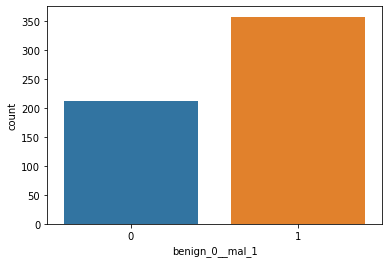

In [4]:
sns.countplot(x='benign_0__mal_1',data=df)

<AxesSubplot:>

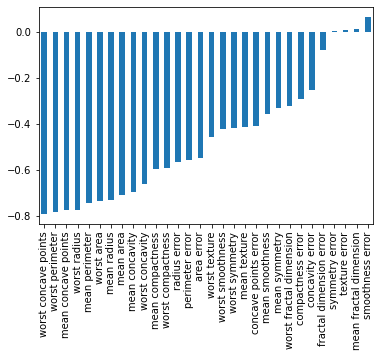

In [5]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

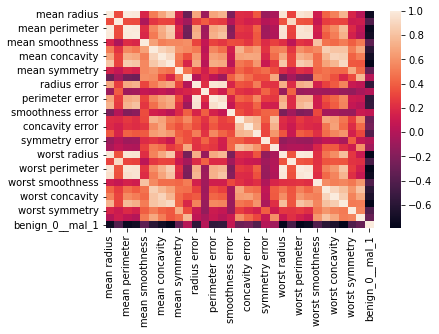

In [6]:
sns.heatmap(df.corr())

In [7]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [10]:
from sklearn.preprocessing import MinMaxScaler


In [11]:
scaler = MinMaxScaler()

In [12]:
X_train=scaler.fit_transform(X_train)

In [13]:
X_test = scaler.transform(X_test)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [15]:
X_train.shape

(426, 30)

In [16]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#Binary classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer = 'adam')


Metal device set to: Apple M1


2022-05-03 14:07:43.932755: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-03 14:07:43.932830: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [17]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test) )

2022-05-03 14:07:43.974232: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/600


2022-05-03 14:07:44.157071: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 12ms/step - loss: 0.6764 - val_loss: 0.6539
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6374 - val_loss: 0.6172
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5991 - val_loss: 0.5784


2022-05-03 14:07:44.373321: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5543 - val_loss: 0.5230
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4963 - val_loss: 0.4631
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4379 - val_loss: 0.3979
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3796 - val_loss: 0.3434
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3333 - val_loss: 0.2998
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.2948 - val_loss: 0.2640
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.2679 - val_loss: 0.2366
Epoch 11/600
14/14 [==============================] - 0s 6ms/step - loss: 0.2447 - val_loss: 0.2196
Epoch 12/600
14/14 [==============================] - 0s 6ms/step - loss: 0.2286 - val_loss: 0.2017
Epoch 13/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2105 - val_loss: 0.1883
Epoch 

Epoch 86/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0524 - val_loss: 0.1107
Epoch 87/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0583 - val_loss: 0.1219
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0512 - val_loss: 0.1160
Epoch 89/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0511 - val_loss: 0.1170
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0532 - val_loss: 0.1094
Epoch 91/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0515 - val_loss: 0.1155
Epoch 92/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0516 - val_loss: 0.1129
Epoch 93/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0487 - val_loss: 0.1149
Epoch 94/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0513 - val_loss: 0.1117
Epoch 95/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0488 - val_loss: 0.1144


14/14 [==============================] - 0s 6ms/step - loss: 0.0367 - val_loss: 0.1301
Epoch 168/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0375 - val_loss: 0.1330
Epoch 169/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0358 - val_loss: 0.1437
Epoch 170/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0365 - val_loss: 0.1289
Epoch 171/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0364 - val_loss: 0.1435
Epoch 172/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0388 - val_loss: 0.1462
Epoch 173/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0351 - val_loss: 0.1408
Epoch 174/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0353 - val_loss: 0.1360
Epoch 175/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0341 - val_loss: 0.1479
Epoch 176/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0396 - val_loss: 0.1287
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0252 - val_loss: 0.1387
Epoch 249/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0290 - val_loss: 0.1780
Epoch 250/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0280 - val_loss: 0.1525
Epoch 251/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0251 - val_loss: 0.1569
Epoch 252/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0274 - val_loss: 0.1546
Epoch 253/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0336 - val_loss: 0.1471
Epoch 254/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0267 - val_loss: 0.1554
Epoch 255/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0246 - val_loss: 0.1789
Epoch 256/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0250 - val_loss: 0.1385
Epoch 257/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0267 - val_loss: 0.1716
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0156 - val_loss: 0.1878
Epoch 330/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0147 - val_loss: 0.1680
Epoch 331/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0157 - val_loss: 0.2016
Epoch 332/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0157 - val_loss: 0.1580
Epoch 333/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0157 - val_loss: 0.1898
Epoch 334/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0148 - val_loss: 0.1711
Epoch 335/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0145 - val_loss: 0.1766
Epoch 336/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0144 - val_loss: 0.1830
Epoch 337/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0146 - val_loss: 0.1518
Epoch 338/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0176 - val_loss: 0.1924
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0088 - val_loss: 0.1907
Epoch 411/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0083 - val_loss: 0.2014
Epoch 412/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0080 - val_loss: 0.1863
Epoch 413/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0091 - val_loss: 0.2146
Epoch 414/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0090 - val_loss: 0.1822
Epoch 415/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0101 - val_loss: 0.2149
Epoch 416/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0077 - val_loss: 0.1846
Epoch 417/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0081 - val_loss: 0.2187
Epoch 418/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0093 - val_loss: 0.1873
Epoch 419/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0080 - val_loss: 0.1957
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0052 - val_loss: 0.2187
Epoch 492/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0049 - val_loss: 0.2224
Epoch 493/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0047 - val_loss: 0.2171
Epoch 494/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0044 - val_loss: 0.2087
Epoch 495/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0043 - val_loss: 0.2471
Epoch 496/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0042 - val_loss: 0.2111
Epoch 497/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0044 - val_loss: 0.2422
Epoch 498/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0044 - val_loss: 0.2169
Epoch 499/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0047 - val_loss: 0.2224
Epoch 500/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0043 - val_loss: 0.2356
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0023 - val_loss: 0.2607
Epoch 573/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0025 - val_loss: 0.2708
Epoch 574/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0030 - val_loss: 0.2490
Epoch 575/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0024 - val_loss: 0.2546
Epoch 576/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0023 - val_loss: 0.2579
Epoch 577/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0022 - val_loss: 0.2595
Epoch 578/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 0.2687
Epoch 579/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0022 - val_loss: 0.2604
Epoch 580/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0022 - val_loss: 0.2490
Epoch 581/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0024 - val_loss: 0.2870
Epoc

In [18]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

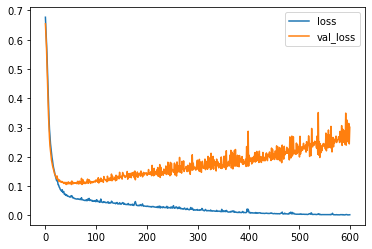

In [19]:
losses.plot()

In [20]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#Binary classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer = 'adam')


In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
early_stop = EarlyStopping(monitor = 'val_loss',mode='min',verbose=1,patience=25)

In [23]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop] )

Epoch 1/600
14/14 [==============================] - ETA: 0s - loss: 0.7059

2022-05-03 14:14:45.783022: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-05-03 14:14:45.957538: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 11ms/step - loss: 0.7059 - val_loss: 0.6794
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6641 - val_loss: 0.6364
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6200 - val_loss: 0.5875
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5699 - val_loss: 0.5290
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5114 - val_loss: 0.4704
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4559 - val_loss: 0.4122
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4077 - val_loss: 0.3631
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3592 - val_loss: 0.3203
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3249 - val_loss: 0.2874
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3013 - val_loss: 0.2627
Epoch 11/600
14/14 [

<AxesSubplot:>

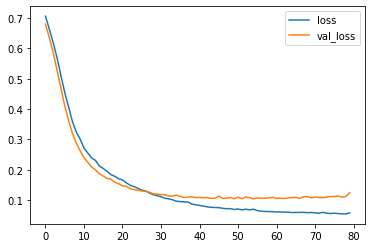

In [24]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [26]:
from tensorflow.keras.layers import Dropout

In [27]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

#Binary classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer = 'adam')


In [28]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop] )

Epoch 1/600


2022-05-03 14:18:40.377902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 12ms/step - loss: 0.7017 - val_loss: 0.6863
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6847 - val_loss: 0.6770
Epoch 3/600
12/14 [========================>.....] - ETA: 0s - loss: 0.6756

2022-05-03 14:18:40.720407: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 6ms/step - loss: 0.6748 - val_loss: 0.6650
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6652 - val_loss: 0.6523
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6507 - val_loss: 0.6352
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6466 - val_loss: 0.6162
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6283 - val_loss: 0.5986
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6143 - val_loss: 0.5704
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5842 - val_loss: 0.5405
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5735 - val_loss: 0.5094
Epoch 11/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5469 - val_loss: 0.4800
Epoch 12/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5266 - val_loss: 0.4529
Epoch 13/600
14/14 

14/14 [==============================] - 0s 6ms/step - loss: 0.1195 - val_loss: 0.0955
Epoch 86/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1018 - val_loss: 0.1039
Epoch 87/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1135 - val_loss: 0.0827
Epoch 88/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1076 - val_loss: 0.0976
Epoch 89/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1152 - val_loss: 0.1166
Epoch 90/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1239 - val_loss: 0.0928
Epoch 91/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1060 - val_loss: 0.0864
Epoch 92/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0954 - val_loss: 0.0934
Epoch 93/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1186 - val_loss: 0.0957
Epoch 94/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1059 - val_loss: 0.1152
Epoch 95/600


<AxesSubplot:>

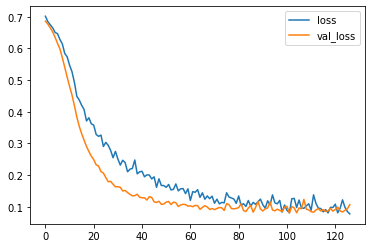

In [29]:
model_loss= pd.DataFrame(model.history.history)
model_loss.plot()

In [39]:

predictions = (model.predict(X_test) > 0.5).astype("int32")

In [40]:
predictions

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        55
           1       0.99      0.94      0.97        88

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [43]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 5 83]]
